# Unit 5 - Financial Planning


In [76]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline
import json

In [77]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [78]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [79]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [80]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_content = btc_response.content
btc_data = btc_response.json()
#print(json.dumps(btc_data, indent=4))
btc_price = float (btc_data["data"]["1"]["quotes"]["USD"]["price"])
print(btc_price)
 
    
# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_content = eth_response.content
eth_data = eth_response.json()
#print (json.dumps(eth_data, indent=4))
eth_price = float (eth_data["data"]["1027"]["quotes"]["USD"]["price"])
print (eth_price)
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

32864.0
1822.92
The current value of your 1.2 BTC is $39436.80
The current value of your 5.3 ETH is $9661.48


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [81]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [82]:
# Set Alpaca API key and secret
alpaca_api_key = "PKEPTYALQ9KHNE6HF6TW"
alpaca_secret_key = "tkKWWcdb127XDrg654vNiMv3n3OqTDrs6tgsjdHG"
# Create the Alpaca API object


api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [83]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-06-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-25", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
    
    

).df



# Preview DataFrame
df_portfolio.head()

AGG                                       SPY  \
                             open    high       low   close   volume   open   
time                                                                          
2021-06-25 00:00:00-04:00  115.11  115.13  114.7516  114.89  3987588  425.9   

                                                               
                               high     low   close    volume  
time                                                           
2021-06-25 00:00:00-04:00  427.0943  425.55  426.57  50460394

In [84]:
# Pick AGG and SPY close price
agg_close_price = 114.89
spy_close_price = 426.57

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.89
Current SPY closing price: $426.57


In [85]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21328.50
The current value of your 200 AGG shares is $22978.00


### Savings Health Analysis

In [86]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
# 1st - create dictionary that houses the sum of BTC & ETH also the sum of SPY & AGG
total_portfolio_dictionary = {"Amount": [my_btc_value+my_eth_value, my_spy_value+my_agg_value]}
#2nd - Create saving dataframe including the above variable
df_savings = pd.DataFrame(total_portfolio_dictionary, index=["Crypto", "Shares"])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,49098.276
Shares,44306.500


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

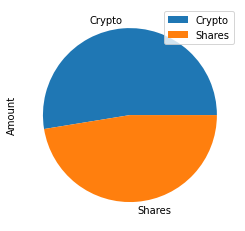

In [87]:
# Plot savings pie chart
df_savings.plot(kind= "pie", subplots=True)

In [88]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()

# Validate saving health
if total_savings > emergency_fund:
    print('CONGRATS!! you have more than 3 months of savings in your emegency fund.')
elif total_savings < emergency_fund:
    print('YOU"RE ON THE WAY!! you have 3 months of emergency funds available')
else:
    print(f'Don"t fret you"re just ${emergency_fund - total_savings} away from your goal!')

CONGRATS!! you have more than 3 months of savings in your emegency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [89]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-08-07', tz='America/New_York').isoformat()

In [90]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date

).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-02-03 00:00:00-05:00  116.97  116.9900  116.8700  116.89  5060310   
2021-02-04 00:00:00-05:00  116.75  116.8900  116.6900  116.86  5128808   
2021-02-05 00:00:00-05:00  116.91  116.9600  116.7000  116.72  3230833   
2021-02-08 00:00:00-05:00  116.75  116.9285  116.7200  116.84  3923885   
2021-02-09 00:00:00-05:00  116.94  116.9700  116.8215  116.86  4050208   

                               SPY                                      
                              open    high       low   close    volume  
time                                                                    
2021-02-03 00:00:00-05:00  382.435  383.70  380.4800  381.86  43305661  
2021-02-04 00:00:00-05:00  382.960  386.24  381.9655  386.17  40030930  
2021-02-05 00:00:00-05:00  388.200  388.47  386.1444  387.68  39312522  
2021-02-08 00:00:00-05:00  389.270  390.54  388.3500  390.53  33986650  
2021-02-09 00:00:00-05:00  389.610  390.89  389.1700  390.25  30861522

In [91]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
Thirty_Year_Port = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [92]:
# Printing the simulation input data
Thirty_Year_Port.portfolio_data.head

<bound method NDFrame.head of                               AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-02-03 00:00:00-05:00  116.97  116.9900  116.8700  116.89  5060310   
2021-02-04 00:00:00-05:00  116.75  116.8900  116.6900  116.86  5128808   
2021-02-05 00:00:00-05:00  116.91  116.9600  116.7000  116.72  3230833   
2021-02-08 00:00:00-05:00  116.75  116.9285  116.7200  116.84  3923885   
2021-02-09 00:00:00-05:00  116.94  116.9700  116.8215  116.86  4050208   
...                           ...       ...       ...     ...      ...   
2021-06-21 00:00:00-04:00  115.06  115.1200  114.9210  114.96  4934966   
2021-06-22 00:00:00-04:00  114.83  115.1400  114.8300  115.11  5299846   
2021-06-23 00:00:00-04:00  115.06  115.1380  114.9900  115.05  5000374   
2021-06-24 00:00:00-04:00  115.10  115.1700  115.0450  115.07  6672880   
2021-06-

In [93]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
Thirty_Year_Port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999650,0.999669,1.002855,1.001252,0.994830,0.999941,0.995090,1.000799,1.002055,1.003350,...,0.999542,1.005053,0.988888,0.999987,0.999863,0.998090,1.003339,0.999338,0.998058,0.996584
2,1.001479,0.991469,1.004946,0.996850,0.999579,1.004850,0.992021,1.005535,1.000838,1.003986,...,0.997550,1.009365,0.991015,0.998625,0.994525,0.996671,1.001818,1.003368,0.996529,1.005640
3,1.003035,0.986803,1.010961,0.993060,0.999546,1.000858,0.989788,1.008714,0.999387,1.005992,...,0.997793,1.005499,0.987886,0.998911,0.996404,0.995335,1.007375,1.000682,1.004858,1.002947
4,1.002684,0.988685,1.007546,0.994572,1.007054,0.997988,0.985918,1.011441,1.000750,1.005253,...,0.999536,1.008054,0.986714,1.002613,0.992717,0.996945,1.004156,1.005325,1.002634,1.004919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,38.411756,42.721553,19.661277,60.739699,37.978711,46.220672,27.719425,15.253797,37.963722,23.379370,...,22.525730,40.058656,39.394845,33.352481,57.266072,38.320490,25.496830,28.447312,39.938748,52.606882
7557,38.216999,42.870487,19.819451,60.606043,38.290570,46.158460,27.520540,15.269201,37.623030,23.392019,...,22.506153,40.092442,39.284579,33.455352,57.185445,38.532096,25.473803,28.446654,39.741934,52.655435
7558,38.229231,42.972047,19.687683,60.370922,38.371210,46.411675,27.605008,15.319932,37.855048,23.374161,...,22.551649,40.117710,39.302076,33.535066,57.450044,38.518063,25.498762,28.331829,39.506832,52.626699
7559,38.328492,43.116880,19.743288,60.197143,38.406492,46.408565,27.541765,15.350532,37.831026,23.674628,...,22.575769,40.319610,39.311315,33.746850,57.638905,38.777710,25.576605,28.150717,39.483363,52.941853


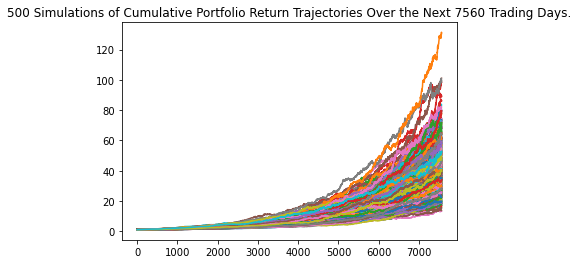

In [94]:
# Plot simulation outcomes
line_plot = Thirty_Year_Port.plot_simulation()

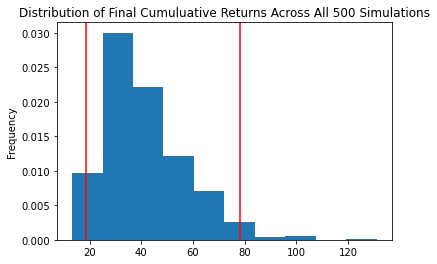

In [95]:
# Plot probability distribution and confidence intervals
dist_plot = Thirty_Year_Port.plot_distribution()

### Retirement Analysis

In [97]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = Thirty_Year_Port.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             41.374165
std              15.779273
min              13.204341
25%              31.234512
50%              38.236397
75%              50.070693
max             131.028140
95% CI Lower     18.497296
95% CI Upper     77.999454
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [100]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $369945.91 and $1559989.07


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [101]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $554918.87 and $2339983.61


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [109]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
Thirty_Year_Port = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 80,
    num_trading_days = 252 * 5
) 
#500 Simulations over 30 years approx. 17 per year, take the output and multiply by new years accounted. 80 simulations approx.

In [110]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
Thirty_Year_Port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.


,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001597,0.995496,0.998727,0.998398,1.006736,0.998261,0.992447,1.004327,1.000985,1.008644,...,1.001574,0.991741,1.006615,1.005382,0.995363,1.005703,1.000604,0.995370,0.999049,1.010539
2,1.000058,0.994115,1.012040,0.997433,1.005732,0.996039,0.993277,1.000697,1.001507,0.996073,...,1.003968,0.992547,1.015346,1.006758,0.996525,1.004213,0.999096,0.995641,0.994410,1.014168
3,0.993698,0.987960,1.009827,0.999115,1.006068,0.988225,0.990217,1.005956,1.004761,1.002277,...,1.006422,0.994909,1.022023,1.009765,0.991685,1.005785,0.994974,0.994562,0.993046,1.016479
4,0.997231,0.989295,1.009536,0.993794,1.002345,0.989882,0.993442,1.006644,1.011746,1.004681,...,1.013465,0.998928,1.016174,1.003927,0.993385,1.004037,1.001780,0.996997,0.994044,1.014475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.651735,1.939833,1.614700,1.516514,1.761490,1.595317,1.794194,2.139552,2.213053,2.132592,...,1.724397,2.106774,1.660373,1.629655,1.896800,1.769901,2.246519,2.054361,1.777112,1.537581
1257,1.643342,1.936720,1.607739,1.514692,1.769540,1.593660,1.800058,2.138132,2.204313,2.122162,...,1.725925,2.105277,1.658265,1.630015,1.893535,1.781132,2.253299,2.047078,1.776328,1.546825
1258,1.645116,1.930977,1.610371,1.515425,1.769040,1.588210,1.802866,2.129115,2.215360,2.115387,...,1.742876,2.098287,1.668131,1.631401,1.894952,1.778918,2.258491,2.044240,1.766962,1.547513
1259,1.642022,1.923052,1.614329,1.516074,1.767911,1.590821,1.801517,2.136290,2.213775,2.118363,...,1.750457,2.107265,1.674962,1.641631,1.897698,1.772630,2.244151,2.043121,1.762606,1.550407


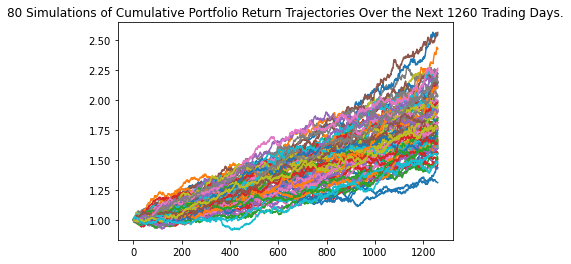

In [111]:
# Plot simulation outcomes
line_plot = Thirty_Year_Port.plot_simulation()

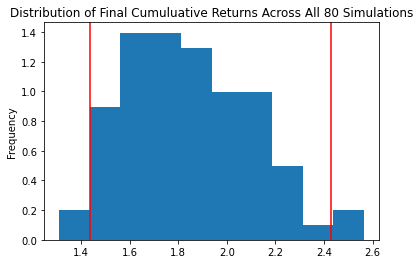

In [112]:
# Plot probability distribution and confidence intervals
dist_plot = Thirty_Year_Port.plot_distribution()

In [113]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = Thirty_Year_Port.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           80.000000
mean             1.850783
std              0.263681
min              1.310508
25%              1.649538
50%              1.833140
75%              2.004641
max              2.563950
95% CI Lower     1.436171
95% CI Upper     2.430060
Name: 1260, dtype: float64


In [123]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $108123.42 and $249073.9


### Ten Years Retirement Option

In [124]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
Thirty_Year_Port = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 160,
    num_trading_days = 252 * 10
)

In [125]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
Thirty_Year_Port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994994,1.005377,1.006397,0.998567,1.001456,1.001288,0.996622,1.002878,0.999471,1.002687,...,1.004080,0.989018,1.002039,1.002050,0.995464,1.001902,1.000453,0.999722,1.002353,1.001794
2,0.996074,1.000668,1.004756,0.998847,1.005943,1.011916,0.993411,1.008703,1.004115,1.001250,...,1.005569,0.991267,0.997590,1.001770,0.995674,0.998231,0.995425,0.997096,1.008312,0.992777
3,1.000790,1.001315,1.013809,1.000832,1.001917,1.006048,0.996832,1.008743,1.000993,1.001798,...,1.009368,0.985479,0.997385,0.997468,0.998237,1.001677,0.992449,0.995161,1.010265,0.997242
4,0.997538,0.998896,1.011296,1.000147,1.003656,1.004750,1.001311,1.003718,1.005277,1.001682,...,1.008184,0.978304,1.002110,1.006029,0.999855,0.998037,0.988971,0.997712,1.008925,0.998336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.231555,4.674178,3.264971,2.649027,2.866797,3.259743,4.198721,2.143705,3.686532,3.819905,...,3.436434,2.908015,5.608401,2.963455,4.403864,3.212981,3.100251,2.877570,2.409013,3.941127
2517,4.193073,4.652588,3.265606,2.662487,2.849001,3.258603,4.186689,2.142080,3.687759,3.844851,...,3.421740,2.919162,5.605612,2.965337,4.368019,3.192337,3.081636,2.853198,2.414193,3.957129
2518,4.186146,4.632101,3.281463,2.664675,2.871864,3.264773,4.223445,2.138959,3.648636,3.832359,...,3.416259,2.909793,5.628908,2.984393,4.378740,3.173938,3.069305,2.843869,2.408366,3.982147
2519,4.163630,4.638552,3.297722,2.668672,2.863700,3.260650,4.214157,2.151085,3.622994,3.826445,...,3.409067,2.896844,5.643636,2.988200,4.375916,3.174283,3.063127,2.827320,2.426516,3.996016


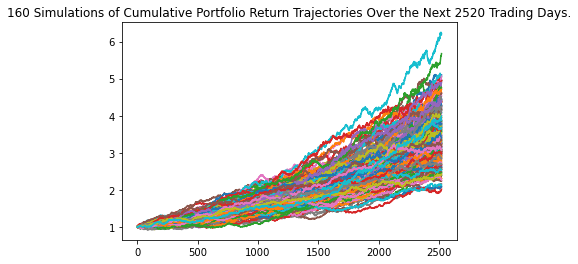

In [126]:
# Plot simulation outcomes
line_plot = Thirty_Year_Port.plot_simulation()

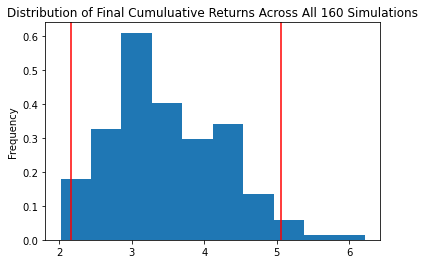

In [127]:
# Plot probability distribution and confidence intervals
dist_plot = Thirty_Year_Port.plot_distribution()

In [128]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = Thirty_Year_Port.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           160.000000
mean              3.475102
std               0.791679
min               2.018024
25%               2.940929
50%               3.342031
75%               4.026136
max               6.213060
95% CI Lower      2.156830
95% CI Upper      5.051342
Name: 2520, dtype: float64


In [131]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment, 2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $107841.51 and $252567.12
